## Churn Prediction in Banking Sector##

### Introduction
Customer churn rate based on the behavior of bank customers is one of the important key business metrics as it can help develop business strategies to reduce the cost. This project analyzes the behavior of bank customers who are more likely to leave the bank (or close the bank account). The model will utilize exploratory data analysis and some predictive analytics techniques to identify the potential customers that are likely to churn. As the project moves forward further analysis techniques and opportunities will be explored. The project has the following objectives - 
1. Predict the chances of any customer leaving the bank.
2. Identify and analyze the major indicators of a customer churn.
3. Develop strategies that can be used to minimize the customer churn rate.
The data for this analysis is taken from publicly available Kaggle database. 

In [164]:
#Import dataset (the list will be expanded as the project moves forward!)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

#from library.sb_utils import save_file

dataset = pd.read_csv('https://raw.github.com/neupanebinod/Capstone-Project-II/master/Capstone-Project-II/Churn_Modelling.csv')
#Checking first five rows of the dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
#Checking column information
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [32]:
#Checking statistical summary of numerical values
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [33]:
#Checking data types
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [36]:
#Rechecking if any missing values are present
missing = pd.concat([dataset.isnull().sum(), 100 * dataset.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending= False)

,count,%
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


In [37]:
dataset.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [38]:
#Since we are interested in evaluating the churn rate, our target variable is 'Exited' 
#Check target variable information
dataset["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [39]:
#Check categorical variables
dataset.select_dtypes('object')

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [40]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [179]:
#Drop columns that are not important in the analysis
dataset = dataset.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,1.032908,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0


In [180]:
# Descriptive statistics of the final dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,-2.766676e-17,1.000050,-3.109504,-0.688359,0.015222,0.698109,2.063884
Age,10000.0,-1.032507e-17,1.000050,-1.994969,-0.660018,-0.183251,0.484225,5.061197
Tenure,10000.0,-1.400324e-16,1.000050,-1.733315,-0.695982,-0.004426,0.687130,1.724464
Balance,10000.0,3.698153e-17,1.000050,-1.225848,-1.225848,0.331964,0.819920,2.795323
NumOfProducts,10000.0,1.530200e+00,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.0,7.055000e-01,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.0,5.151000e-01,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.0,-4.085621e-18,1.000050,-1.740268,-0.853594,0.001803,0.857243,1.737200
Exited,10000.0,2.037000e-01,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000


In [181]:
#average of each features 
dataset.groupby("Exited").agg("mean")

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,0.013703,-0.144309,0.007081,-0.059951,1.544267,0.707146,0.554565,-0.006118
1,-0.053568,0.564131,-0.027682,0.234359,1.475209,0.699067,0.360825,0.023917


In [182]:
#Average age by gender
dataset.groupby("Gender").agg({"Age": "mean"})

,Age
Gender,
Female,0.030188
Male,-0.025132


In [183]:
# Churn rate based on gender
churned.groupby("Gender").agg({"Exited": "count"})

,Exited
Gender,
0,1139
1,898


In [91]:
# Churn rate based on geography
churned.groupby("Geography").agg({"Exited": "count"})

,Exited
Geography,
France,810
Germany,814
Spain,413


In [184]:
# Non-churn (or retained) rate based on gender
remained.groupby("Gender").agg({"Exited": "count"})

,Exited
Gender,
0,3404
1,4559


In [185]:
# Non-churn (or retained) rate based on geography
remained.groupby("Geography").agg({"Exited": "count"})

,Exited
Geography,
0,4204
1,1695
2,2064


In [186]:
# Average tenure (or customer years) of both the churned and non-churned customers, grouped by gender 
dataset.groupby(["Gender", "Exited"]).agg({"Tenure" : "mean"})

Tenure
Gender Exited          
Female 0      -0.012349
       1      -0.027498
Male   0       0.021589
       1      -0.027914

In [187]:
# Average tenure (or customer years) of both the churned and non-churned customers, grouped by geography
dataset.groupby(["Geography", "Exited"]).agg({"Tenure" : "mean"})

Tenure
Geography Exited          
France    0      -0.002534
          1      -0.004426
Germany   0      -0.000346
          1      -0.002302
Spain     0       0.032765
          1      -0.123313

In [188]:
# Number of both the churned and non-churned customers, grouped by active membership and credit card possession
dataset.groupby(["IsActiveMember", "HasCrCard"]).agg({"Exited" : "count"})

Exited
IsActiveMember HasCrCard        
0              0            1401
               1            3448
1              0            1544
               1            3607

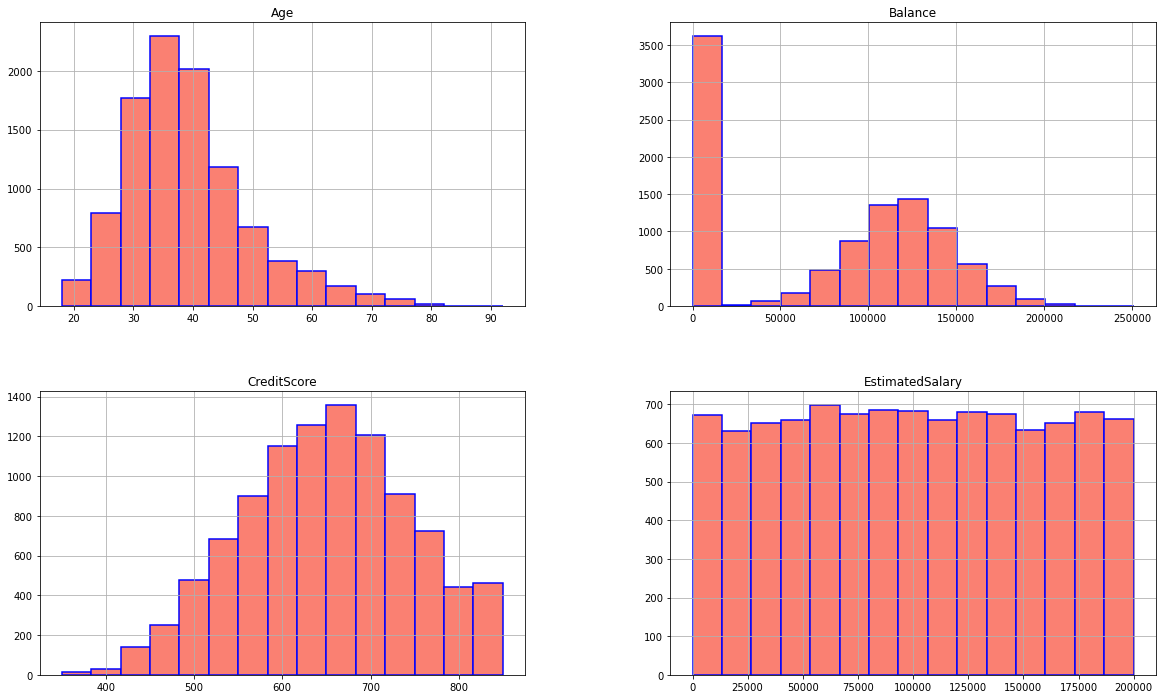

In [108]:
distribution = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
dataset[distribution].hist(figsize = (20, 12), bins = 15, layout = (2, 2), 
                          color = 'salmon', edgecolor = 'blue', linewidth = 1.5);

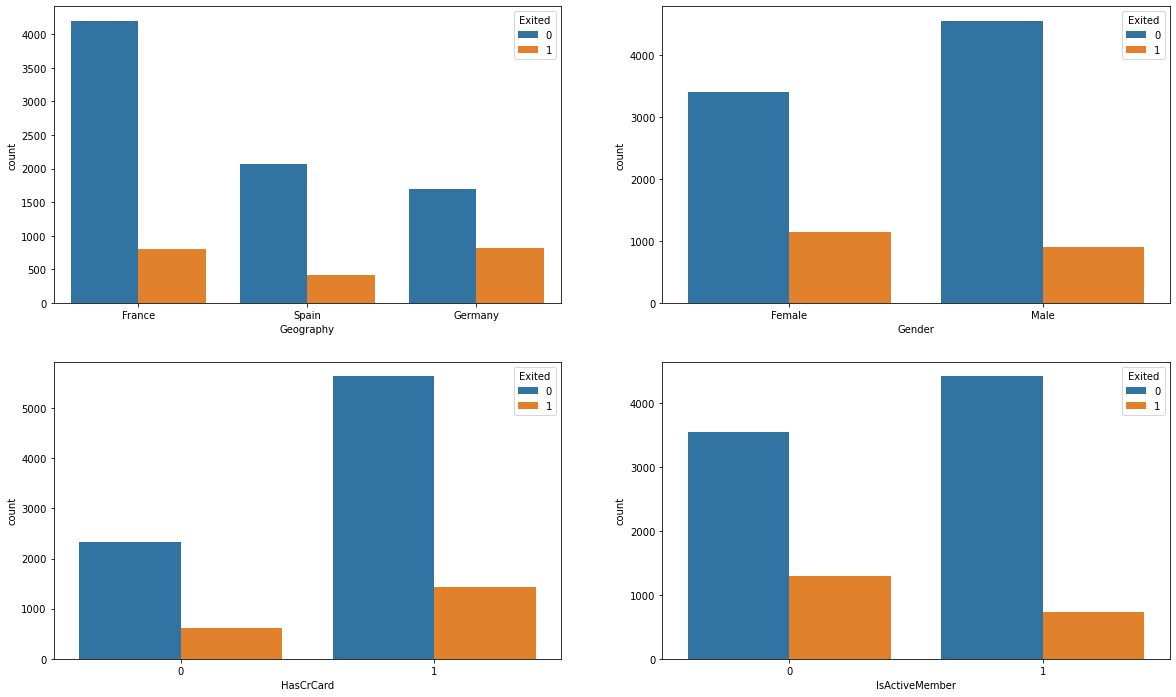

In [103]:
# Plotting categorical variables to visualize target variable.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

In [ ]:
###### Train/Test Model
Target Variable: Exited
Exited = 0, for non-churned customers, and
Exited = 1, for churned customers.

In [151]:
dataset_onehot = pd.get_dummies(dataset.Geography, prefix='Country')
print(dataset_onehot.head())

   Country_0  Country_1  Country_2
0          1          0          0
1          0          0          1
2          1          0          0
3          1          0          0
4          0          0          1


In [196]:
dataset1 = pd.get_dummies(data=dataset, columns=['Gender','Geography'])
dataset2=dataset1.rename(columns = {'Gender_Male':'Male', 'Gender_Female': 'Female', 'Geography_France': 'France', 'Geography_Germany': 'Germany', 'Geography_Spain':'Spain'})
dataset2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,1,0,1,0,0
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,1,0,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,1,1,0,1,0,0
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,1,0,1,0,0
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,1,0,0,0,1


In [197]:
scaler = StandardScaler()
scl_columns = ['CreditScore', 'Age', 'Tenure','Balance', 'EstimatedSalary']
dataset2[scl_columns] = scaler.fit_transform(dataset2[scl_columns])
dataset2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,1,0,1,0,0
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,1,0,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,1,1,0,1,0,0
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,1,0,1,0,0
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,1,0,0,0,1


In [198]:
len(dataset2) * .7, len(dataset2) * .3

(7000.0, 3000.0)

In [199]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

X_train, X_test, y_train, y_test = train_test_split(dataset2.drop(columns='Exited'), 
                                                    dataset.Exited, test_size=0.3, 
                                                    random_state=47)

In [200]:
X_train.shape, X_test.shape

((7000, 13), (3000, 13))

In [201]:
y_train.shape, y_test.shape

((7000,), (3000,))

In [202]:
X_train.dtypes

CreditScore        float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Female               uint8
Male                 uint8
France               uint8
Germany              uint8
Spain                uint8
dtype: object

In [203]:
X_test.dtypes

CreditScore        float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Female               uint8
Male                 uint8
France               uint8
Germany              uint8
Spain                uint8
dtype: object

In [204]:
train_mean = y_train.mean()
train_mean

0.2022857142857143

In [205]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[0.20228571]])

In [206]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([0.20228571, 0.20228571, 0.20228571, 0.20228571, 0.20228571])

In [207]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([0.20228571, 0.20228571, 0.20228571, 0.20228571, 0.20228571])

In [208]:
X_defaults_median = X_train.median()
X_defaults_median

CreditScore        0.004875
Age               -0.183251
Tenure            -0.004426
Balance            0.332585
NumOfProducts      1.000000
HasCrCard          1.000000
IsActiveMember     1.000000
EstimatedSalary    0.011832
Female             0.000000
Male               1.000000
France             1.000000
Germany            0.000000
Spain              0.000000
dtype: float64

In [209]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [210]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In [211]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [212]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [215]:
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.15905711292306535, 0.13062721680947198)

In [219]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.15905711292306535, 0.13062721680947198)

In [216]:
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(0.2809521637063427, 0.29010724557057155)

In [218]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.2809521637063427, 0.29010724557057155)

In [217]:
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(0.13569976153705401, 0.14270841173350837)

In [220]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(0.13569976153705401, 0.14270841173350837)

##### Random Forest Model


In [223]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [222]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [224]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.27668871, 0.33262359, 0.35520203, 0.2603101 , 0.37815679])

In [225]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [227]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [228]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

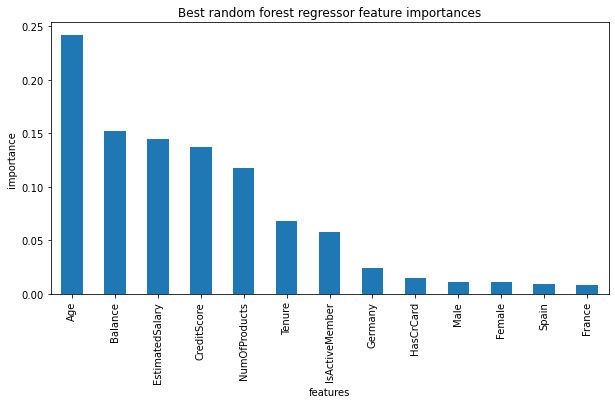

In [230]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');